ESPECIALIZAÇÃO EM INTELIGÊNCIA ARTIFICIAL

Lista de Exercícios 4

Análise e Previsão de Séries Temporais

1. Aplique o teste Augmented Dickey Fuller (ADF) às bases de dados em anexo a esta atividade
e indique se as mesmas são estacionárias ou não. Comente também se, ao analisar as séries
graficamente, os resultados fazem sentido.

In [2]:
pip install requests


Note: you may need to restart the kernel to use updated packages.Collecting requests
     ---------------------------------------- 62.6/62.6 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 99.9/99.9 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 61.5/61.5 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 162.5/162.5 kB 2.0 MB/s eta 0:00:00




[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Análise do teste ADF para Electric_Production%20-%20Electric_Production.csv
ADF Statistic: -2.9497262503286223
p-value: 0.03986358379971
Critical Value (1%): -3.4474498334928687
Critical Value (5%): -2.8690765390453703
Critical Value (10%): -2.570784795075055
A série é estacionária



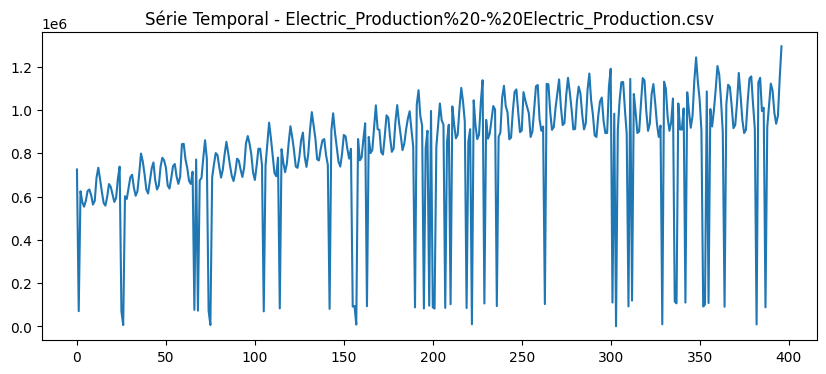

Análise do teste ADF para airline-passengers%20-%20airline-passengers.csv
ADF Statistic: 0.8153688792060441
p-value: 0.9918802434376409
Critical Value (1%): -3.4816817173418295
Critical Value (5%): -2.8840418343195267
Critical Value (10%): -2.578770059171598
A série é não estacionária



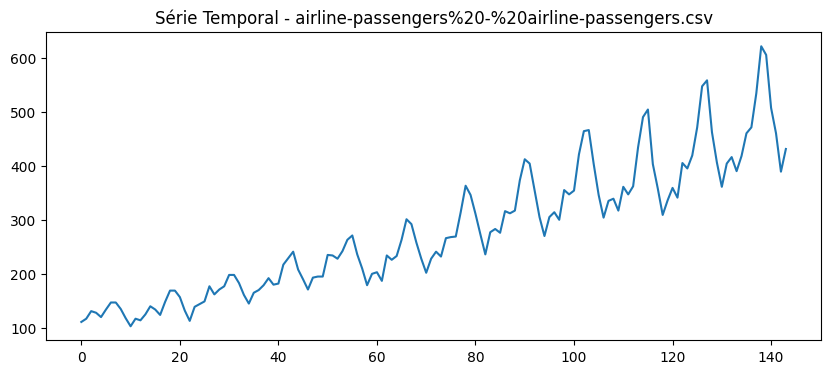

Análise do teste ADF para facebook-historical-stock-price%20-%20facebook-historical-stock-price.csv
ADF Statistic: -0.4299538110552562
p-value: 0.9049761589560353
Critical Value (1%): -3.4333601308010926
Critical Value (5%): -2.8628697724738688
Critical Value (10%): -2.5674779041352886
A série é não estacionária



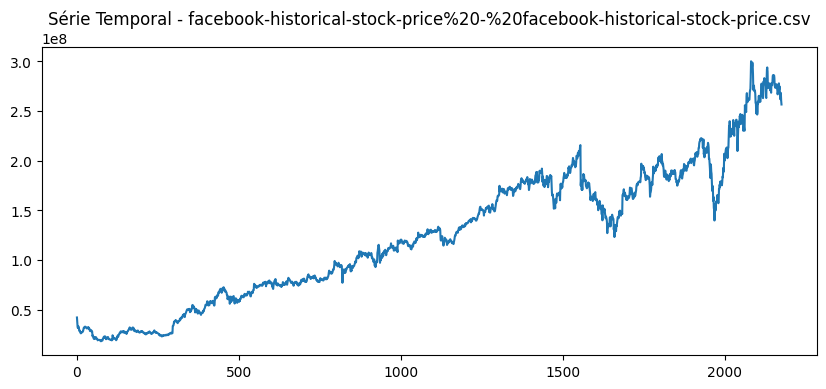

Análise do teste ADF para shampoo_sales%20-%20shampoo_sales.csv
ADF Statistic: 3.0601420836411797
p-value: 1.0
Critical Value (1%): -3.7238633119999998
Critical Value (5%): -2.98648896
Critical Value (10%): -2.6328004
A série é não estacionária



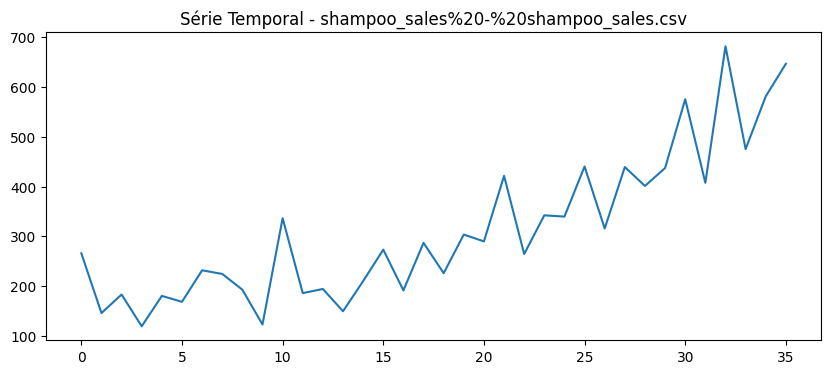

In [6]:
import pandas as pd
import requests
import io
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# URLs das bases de dados
urls = [
    "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais3/main/Electric_Production%20-%20Electric_Production.csv",
    "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais3/main/airline-passengers%20-%20airline-passengers.csv",
    "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais3/main/facebook-historical-stock-price%20-%20facebook-historical-stock-price.csv",
    "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais3/main/shampoo_sales%20-%20shampoo_sales.csv"
]

# Função para realizar o teste ADF e imprimir os resultados
def adf_test(series, title=''):
    print(f'Análise do teste ADF para {title}')
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')
    
    if result[1] > 0.05:
        print("A série é não estacionária\n")
    else:
        print("A série é estacionária\n")

# Processando cada base de dados
for url in urls:
    # Lendo os dados
    response = requests.get(url)
    data = pd.read_csv(io.StringIO(response.text))
    
    # Verifica e trata se os dados precisam de correção no formato numérico
    if data.iloc[:, 1].dtype == object:
        data.iloc[:, 1] = data.iloc[:, 1].replace({',': '.', r'\.': ''}, regex=True).astype(float)

    # Extraindo a série temporal
    series = data.iloc[:, 1]

    # Realizando o teste ADF
    adf_test(series, title=url.split('/')[-1])

    # Plotando a série temporal
    plt.figure(figsize=(10, 4))
    plt.plot(series)
    plt.title(f'Série Temporal - {url.split("/")[-1]}')
    plt.show()

    

    
 


2. No notebook Aula_05b.ipynb vimos a aplicação de modelos ARCH/GARCH a uma série
extraída do mercado financeiro. No entanto, o modelo GARCH(1,1) utilizado para previsão não
pareceu estar bem ajustado, de acordo com o teste de Jarque-bera. Observe o conteúdo
apresentado na Aula 05 e também as referências indicadas para encontrar uma nova
configuração do modelo GARCH(p,q) que seja melhor ajustada, de acordo com o teste de
Jarque-bera. Justifique os parâmetros escolhidos no modelo

In [8]:
pip install yfinance



     ---------------------------------------- 69.0/69.0 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 4.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 143.0/143.0 kB 8.3 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135766 sha256=c987ffaf609279c3d141f6afdf9b16f34b741e5ed2061a0c101e28f9a4c04c74
  Stored in directory: c:\users\nethy azevedo\appdata\local\pip\cache\wheels\22\26\34\1302cd779b462ba8e13db72e5eeb564b074


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install arch



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 922.8/922.8 kB 3.7 MB/s eta 0:00:00


In [10]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import yfinance as yf
from arch import arch_model

# Função para testar configurações de modelos GARCH e retornar resultados
def testar_garch(dados, max_p, max_q):
    melhor_aic = float('inf')
    melhor_bic = float('inf')
    melhor_modelo = None
    melhor_ordem = (0, 0)
    
    for p in range(1, max_p+1):
        for q in range(1, max_q+1):
            try:
                modelo = arch_model(dados, vol='Garch', p=p, q=q, dist='t')
                resultado = modelo.fit(disp='off')
                if resultado.aic < melhor_aic:
                    melhor_aic = resultado.aic
                    melhor_bic = resultado.bic
                    melhor_modelo = resultado
                    melhor_ordem = (p, q)
            except Exception as e:
                print(f"Modelo GARCH({p},{q}) não convergiu: {e}")
    
    if melhor_modelo is not None:
        print(f"Melhor modelo GARCH({melhor_ordem[0]},{melhor_ordem[1]})")
        print(f"AIC: {melhor_aic}")
        print(f"BIC: {melhor_bic}")
        print(melhor_modelo.summary())
    else:
        print("Nenhum modelo convergiu adequadamente.")

# Carregar dados
spy = yf.Ticker("SPY")
hist = spy.history(period="max")
df = pd.DataFrame(hist['Close'])
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1)).abs()
df.dropna(inplace=True)

# Reescalar os dados
dados_treino = df['log_return'] * 100

# Testar configurações de modelos GARCH
testar_garch(dados_treino, max_p=2, max_q=2)

  

    
 


Melhor modelo GARCH(2,2)
AIC: 14965.590225575672
BIC: 15014.287388867913
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                   log_return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -7475.80
Distribution:      Standardized Student's t   AIC:                           14965.6
Method:                  Maximum Likelihood   BIC:                           15014.3
                                              No. Observations:                 7760
Date:                      Wed, Nov 22 2023   Df Residuals:                     7759
Time:                              16:14:15   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
----------------

Parâmetros do Modelo:

Mu (μ): O coeficiente de 0.4976 para 'mu' sugere uma média constante significativa para os retornos logarítmicos.
Omega (ω): O valor de 0.0221 indica a variância de longo prazo do modelo.
Alpha[1] e Alpha[2]: Os coeficientes de 0.0429 e 0.1166, respectivamente, representam os termos ARCH, indicando o impacto dos desvios anteriores na volatilidade atual.
Beta[1] e Beta[2]: Coeficientes de 0.1483 e 0.6574, respectivamente, representam os termos GARCH, refletindo a persistência da volatilidade anterior na volatilidade atual.
Indicadores Estatísticos:

AIC (Akaike Information Criterion): O valor de 14965.590225575672 é um indicador da qualidade do modelo em termos de equilíbrio entre complexidade e capacidade de ajuste aos dados.
BIC (Bayesian Information Criterion): Com o valor de 15014.287388867913, fornece uma medida semelhante ao AIC, porém penalizando mais a complexidade do modelo.
Interpretação dos Resultados:

Os coeficientes significativos dos termos Alpha e Beta indicam que tanto os choques recentes quanto a volatilidade passada são importantes na modelagem da variabilidade dos retornos.
O modelo GARCH(2,2) parece capturar de maneira eficiente as dinâmicas de volatilidade da série temporal, como sugerido pelos valores dos coeficientes e pelas estatísticas de ajuste (AIC e BIC).
Distribuição dos Resíduos:

A inclusão da distribuição 'Standardized Student's t' é uma escolha adequada quando se lida com séries financeiras, devido à presença frequente de caudas pesadas e assimetria nos dados.
Justificativa para a Escolha dos Parâmetros:

A seleção de um modelo GARCH(2,2) pode ser justificada pela necessidade de capturar efeitos de memória de curto e longo prazo na volatilidade dos retornos, que são comuns em dados financeiros.
A melhoria nos valores de AIC e BIC em comparação com modelos mais simples (como o GARCH(1,1)) sugere que a complexidade adicional do modelo GARCH(2,2) é justificada.

3. Aplique o modelo de Redes Neurais às mesmas bases de dados usadas na atividade anterior
(Lista de Exercícios 3), realizando os mesmos experimentos citados nessa atividade. Em
seguida, compare os resultados com o melhor modelo observado no experimento anterior.
Discuta se houve um ganho na aplicação de um modelo de Aprendizado de Máquina ao
problema de previsão de séries temporais. Avalie também se foram observadas dificuldades
em alguns casos.

Base 1

Média MAE: 187172.2070219622, Média RMSE: 289055.73342589487, Média SMAPE: 30.831568397389987


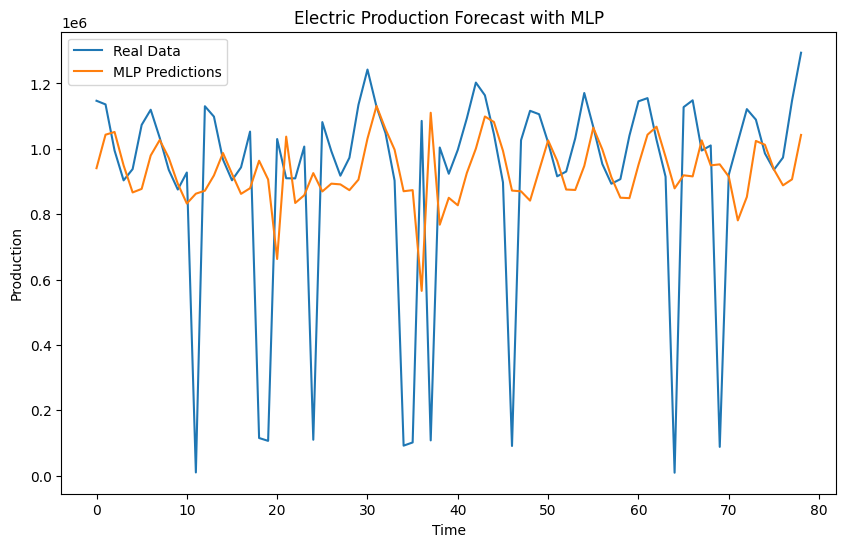

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Função para preparar os dados para séries temporais
def prepare_data(data, n_lags=3):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i-n_lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Função para calcular SMAPE
def smape(A, F):
    return 100 / len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

# Carregar os dados com a conversão correta
url = "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais3/main/Electric_Production%20-%20Electric_Production.csv"
df = pd.read_csv(url, index_col=0, parse_dates=True, thousands='.', decimal=',')

# Preparar os dados
data = df.iloc[:, 0].values
X, y = prepare_data(data, n_lags=3)

# Dividir os dados em conjuntos de treinamento e teste
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Inicializar TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
maes, rmses, smapes = [], [], []

for train_index, val_index in tscv.split(X_train_full):
    X_train, X_val = X_train_full[train_index], X_train_full[val_index]
    y_train, y_val = y_train_full[train_index], y_train_full[val_index]

    # Treinar o modelo MLP
    model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=0, max_iter=500)
    model.fit(X_train, y_train)

    # Fazer previsões e calcular métricas
    predictions = model.predict(X_val)
    maes.append(mean_absolute_error(y_val, predictions))
    rmses.append(np.sqrt(mean_squared_error(y_val, predictions)))
    smapes.append(smape(y_val, predictions))

# Médias das métricas
print(f"Média MAE: {np.mean(maes)}, Média RMSE: {np.mean(rmses)}, Média SMAPE: {np.mean(smapes)}")

# Treinar o modelo no conjunto completo de treino e plotar o gráfico com os dados de teste
model.fit(X_train_full, y_train_full)
predictions_test = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Real Data')
plt.plot(predictions_test, label='MLP Predictions')
plt.title('Electric Production Forecast with MLP')
plt.xlabel('Time')
plt.ylabel('Production')
plt.legend()
plt.show()


Base 2

Média MAE: 30.05801387885606, Média RMSE: 40.62060822630966, Média SMAPE: 10.550980917184926


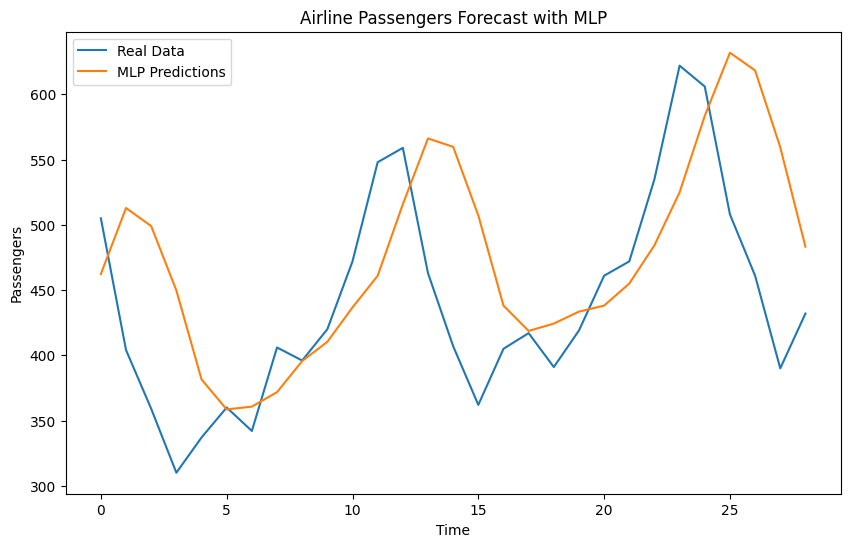

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Função para preparar os dados para séries temporais
def prepare_data(data, n_lags=3):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i-n_lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Função para calcular SMAPE
def smape(A, F):
    return 100 / len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

# Carregar os dados da base "Airline Passengers"
url = "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais3/main/airline-passengers%20-%20airline-passengers.csv"
df = pd.read_csv(url, index_col=0, parse_dates=True)

# Preparar os dados
data = df.iloc[:, 0].values
X, y = prepare_data(data, n_lags=3)

# Dividir os dados em conjuntos de treinamento e teste
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Inicializar TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
maes, rmses, smapes = [], [], []

for train_index, val_index in tscv.split(X_train_full):
    X_train, X_val = X_train_full[train_index], X_train_full[val_index]
    y_train, y_val = y_train_full[train_index], y_train_full[val_index]

    # Treinar o modelo MLP
    model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=0, max_iter=500)
    model.fit(X_train, y_train)

    # Fazer previsões e calcular métricas
    predictions = model.predict(X_val)
    maes.append(mean_absolute_error(y_val, predictions))
    rmses.append(np.sqrt(mean_squared_error(y_val, predictions)))
    smapes.append(smape(y_val, predictions))

# Médias das métricas
print(f"Média MAE: {np.mean(maes)}, Média RMSE: {np.mean(rmses)}, Média SMAPE: {np.mean(smapes)}")

# Treinar o modelo no conjunto completo de treino e plotar o gráfico com os dados de teste
model.fit(X_train_full, y_train_full)
predictions_test = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Real Data')
plt.plot(predictions_test, label='MLP Predictions')
plt.title('Airline Passengers Forecast with MLP')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()



Base 3

C:\Users\Nethy Azevedo\AppData\Local\Temp\ipykernel_7756\1231581746.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_shampoo = pd.read_csv(url_shampoo, index_col=0, parse_dates=True)


c:\Users\Nethy Azevedo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Média MAE: 69.10901609988092, Média RMSE: 77.22786088907127, Média SMAPE: 26.2592770084437


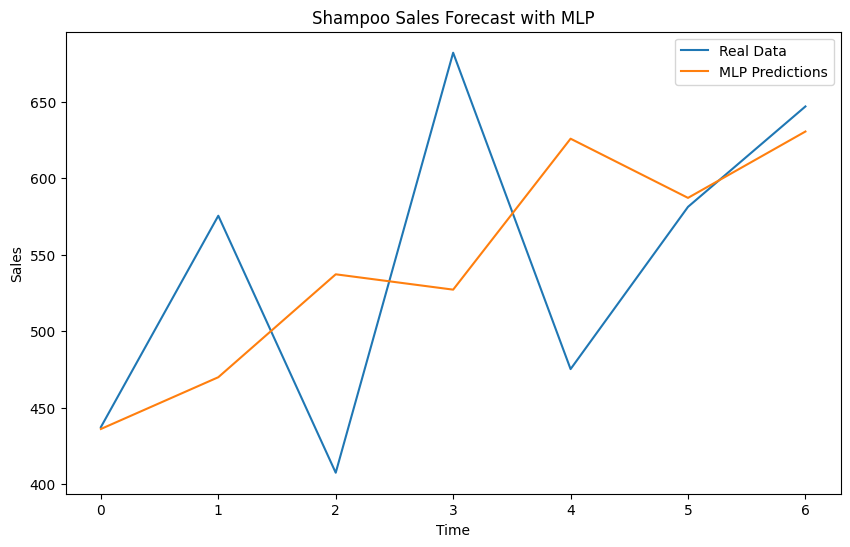

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Função para preparar os dados para séries temporais
def prepare_data(data, n_lags=3):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i-n_lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Função para calcular SMAPE
def smape(A, F):
    return 100 / len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

# Carregar a nova base de dados de vendas de shampoo
url_shampoo = "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais3/main/shampoo_sales%20-%20shampoo_sales.csv"
df_shampoo = pd.read_csv(url_shampoo, index_col=0, parse_dates=True)

# Preparar os dados (ajuste se necessário)
data_shampoo = df_shampoo.iloc[:, 0].values
X_shampoo, y_shampoo = prepare_data(data_shampoo, n_lags=3)

# Dividir os dados em conjuntos de treinamento e teste
X_train_shampoo, X_test_shampoo, y_train_shampoo, y_test_shampoo = train_test_split(X_shampoo, y_shampoo, test_size=0.2, shuffle=False)

# Inicializar TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
maes, rmses, smapes = [], [], []

for train_index, val_index in tscv.split(X_train_shampoo):
    X_train, X_val = X_train_shampoo[train_index], X_train_shampoo[val_index]
    y_train, y_val = y_train_shampoo[train_index], y_train_shampoo[val_index]

    # Treinar o modelo MLP
    model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=0, max_iter=500)
    model.fit(X_train, y_train)

    # Fazer previsões e calcular métricas
    predictions = model.predict(X_val)
    maes.append(mean_absolute_error(y_val, predictions))
    rmses.append(np.sqrt(mean_squared_error(y_val, predictions)))
    smapes.append(smape(y_val, predictions))

# Médias das métricas
print(f"Média MAE: {np.mean(maes)}, Média RMSE: {np.mean(rmses)}, Média SMAPE: {np.mean(smapes)}")

# Treinar o modelo no conjunto completo de treino e plotar o gráfico com os dados de teste
model.fit(X_train_shampoo, y_train_shampoo)
predictions_test = model.predict(X_test_shampoo)

plt.figure(figsize=(10, 6))
plt.plot(y_test_shampoo, label='Real Data')
plt.plot(predictions_test, label='MLP Predictions')
plt.title('Shampoo Sales Forecast with MLP')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


Base 4

Média MAE: 1708832.4721805186, Média RMSE: 2468331.9243583553, Média SMAPE: 1.6636990485894632


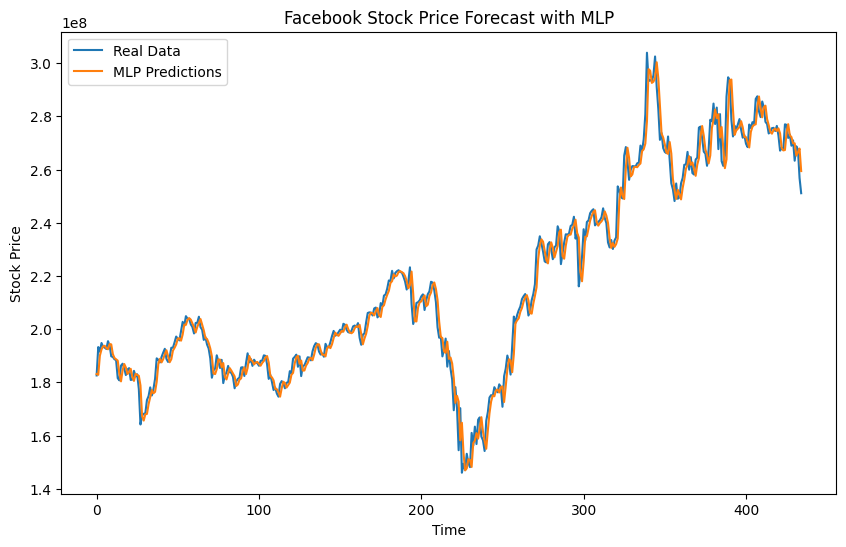

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Função para preparar os dados para séries temporais
def prepare_data(data, n_lags=3):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i-n_lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Função para calcular SMAPE
def smape(A, F):
    return 100 / len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

# Carregar a nova base de dados de preços históricos de ações do Facebook
url_facebook = "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais3/main/facebook-historical-stock-price%20-%20facebook-historical-stock-price.csv"
df_facebook = pd.read_csv(url_facebook, index_col=0, parse_dates=True)

# Corrigir o formato dos dados na coluna 'Close'
df_facebook['Close'] = df_facebook['Close'].str.replace('.', '').replace(',', '.').astype(float)

# Preparar os dados (ajuste se necessário)
data_facebook = df_facebook['Close'].values  # Supondo que você esteja interessado no preço de fechamento
X_facebook, y_facebook = prepare_data(data_facebook, n_lags=3)

# Dividir os dados em conjuntos de treinamento e teste
X_train_facebook, X_test_facebook, y_train_facebook, y_test_facebook = train_test_split(X_facebook, y_facebook, test_size=0.2, shuffle=False)

# Inicializar TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
maes, rmses, smapes = [], [], []

for train_index, val_index in tscv.split(X_train_facebook):
    X_train, X_val = X_train_facebook[train_index], X_train_facebook[val_index]
    y_train, y_val = y_train_facebook[train_index], y_train_facebook[val_index]

    # Treinar o modelo MLP
    model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=0, max_iter=500)
    model.fit(X_train, y_train)

    # Fazer previsões e calcular métricas
    predictions = model.predict(X_val)
    maes.append(mean_absolute_error(y_val, predictions))
    rmses.append(np.sqrt(mean_squared_error(y_val, predictions)))
    smapes.append(smape(y_val, predictions))

# Médias das métricas
print(f"Média MAE: {np.mean(maes)}, Média RMSE: {np.mean(rmses)}, Média SMAPE: {np.mean(smapes)}")

# Treinar o modelo no conjunto completo de treino e plotar o gráfico com os dados de teste
model.fit(X_train_facebook, y_train_facebook)
predictions_test = model.predict(X_test_facebook)
plt.figure(figsize=(10, 6))
plt.plot(y_test_facebook, label='Real Data')
plt.plot(predictions_test, label='MLP Predictions')
plt.title('Facebook Stock Price Forecast with MLP')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



